<a href="https://colab.research.google.com/github/fatemakotha/1804-Applied-Machine-Learning/blob/main/Lab_2_Intro_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro to pandas

In [ ]:
# Basic Concepts
# The following line imports the pandas API and prints the API version:
from __future__ import print_function
import pandas as pd
pd.__version__



'1.3.5'

In [ ]:
# The primary data structures in pandas are implemented as two classes:

# DataFrame, which you can imagine as a relational data table, with rows and named columns.
# Series, which is a single column. A DataFrame contains one or more Series and a name for each Series.
# The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

# One way to create a Series is to construct a Series object. For example:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [ ]:
# DataFrame objects can be created by passing a dict mapping string column names to their respective Series. 
# If the Series don't match in length, missing values are filled with special NA/NaN values. Examples:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })


City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199

In [ ]:
country_names = pd.Series(['England', 'Germany', 'France'])
country_population = pd.Series([56000000, 83000000])

pd.DataFrame({ 'Country Name': country_names, 'Country Population': country_population })

Country Name  Country Population
0      England          56000000.0
1      Germany          83000000.0
2       France                 NaN

In [ ]:
# But most of the time, you load an entire file into a DataFrame. 
# The following example loads a file with California housing data. 
# Run the following cell to load the data and create feature definitions:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()#Gives a statistic of the Data
# sepstr, default ‘,’
# *** If sep is None, the C engine cannot automatically detect the separator, but the Python parsing engine can, 
# meaning the latter will be used and automatically detect the separator by Python’s builtin sniffer tool, csv.Sniffer.
#  In addition, separators longer than 1 character and different from '\s+' will be interpreted as regular expressions and 
# will also force the use of the Python parsing engine. 
# Note that regex delimiters are prone to ignoring quoted data. Regex example: '\r\t'.

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

In [ ]:
california_housing_dataframe.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7f079f6d0>]],
      dtype=object)

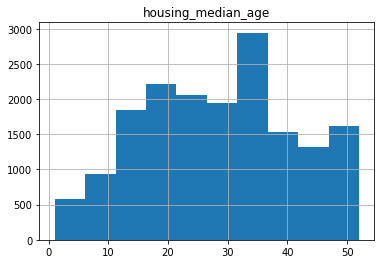

In [ ]:
# Another powerful feature of *pandas* is graphing. For example, `DataFrame.
# hist` lets you quickly study the distribution of values in a column:
california_housing_dataframe.hist('housing_median_age')

**Accessing Data**

You can access DataFrame data using familiar Python dict/list operations:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [ ]:
print(type(cities['City name'][1])) #prints the name of the first city
cities['City name'][1]

<class 'str'>


'San Jose'

In [ ]:
print(type(cities[0:2])) #prints the names of the cities at index 0 and 1 but less than 2
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


City name  Population
0  San Francisco      852469
1       San Jose     1015785

**Manipulating Data**

You may apply Python's basic arithmetic operations to Series. For example:

In [ ]:
population / 1000.0

0     852.469
1    1015.785
2     485.199
dtype: float64

**[NumPy](http://www.numpy.org/)** 

is a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:


In [ ]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [ ]:
# *** For more complex single-column transformations, you can use Series.apply. Like the Python map function, 
# Series.apply accepts as an argument a lambda function, which is applied to each value.
# The example below creates a new Series that indicates whether population is over one million:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

Modifying DataFrames

In [ ]:
# *** Modifying DataFrames is also straightforward. For example, the following code adds two Series to an existing DataFrame:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities


City name  Population  Area square miles  Population density
0  San Francisco      852469              46.87        18187.945381
1       San Jose     1015785             176.53         5754.177760
2     Sacramento      485199              97.92         4955.055147

**Exercise #1**
********************
Modify the cities table by adding a new boolean column that is True if and only if both of the following are True:

The city is named after a saint.
The city has an area greater than 50 square miles.
Note: Boolean Series are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing logical and, use & instead of and.

Hint: "San" in Spanish means "saint."

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

City name  Population  Area square miles  Population density  \
0  San Francisco      852469              46.87        18187.945381   
1       San Jose     1015785             176.53         5754.177760   
2     Sacramento      485199              97.92         4955.055147   

   Is wide and has saint name  
0                       False  
1                        True  
2                       False

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row. 

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
# Call `DataFrame.reindex` to manually reorder the rows:
cities.reindex([2, 0, 1])

City name  Population  Area square miles  Population density  \
2     Sacramento      485199              97.92         4955.055147   
0  San Francisco      852469              46.87        18187.945381   
1       San Jose     1015785             176.53         5754.177760   

   Is wide and has saint name  
2                       False  
0                       False  
1                        True

## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! 

In [ ]:
# If your reindex input array includes values not in the original DataFrame index values, 
# reindex will add new rows for these "missing" indices and populate all corresponding columns with NaN values:
# ** The population, area, density, is wide, is already made in the prev codes above
cities.reindex([0, 4, 5, 2])

City name  Population
0  San Francisco    852469.0
4            NaN         NaN
5            NaN         NaN
2     Sacramento    485199.0